In [1]:
pip install faker

You should consider upgrading via the '/Users/varunvaddi/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pnds
import numpy as npy
import faker
import datetime as dtm
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from faker import Faker

In [4]:
create = Faker()

In [5]:
#Defining a function Names to create names and generating 50,000 records
def Names(s):
    Name = []
    for _ in range(0, s):
        Name.append(create.name())
    return Name
Name = Names(50000)

In [6]:
#Creating another feature called "age" having 50000 random records 
Age = npy.random.randint(18, 100, size = 50000, dtype = 'int')

In [7]:
#Creating another feature called "NHSNumber" having 50000 random records 
NHSNumber= npy.random.randint(200000, 300000 , size = 50000, dtype = 'int')

In [8]:
#Defining a function called Address to create names and generating 50,000 records
def Addr(u):
    Address = []
    for _ in range(0, u):
        Address.append(create.address())
    return Address
Address = Addr(50000)

In [19]:
#Defining a function called CountyUK to create names and generating 50,000 records
def CountyUK(h):
    county = []
    for _ in range(0,h):
        county.append(create.random_element(elements = ("Bath and North East Somerset","Bedfordshire","Berkshire","Bristol",
                                                        "Buckinghamshire")))
    return county
county = CountyUK(50000)

In [17]:
start = '2021-01-10' 
end = '2021-08-01' 
n = 50000 
x = npy.random.randint(pnds.Timestamp(start).value, pnds.Timestamp(end).value,n)
random_dates = [pnds.to_datetime((i/10**9)/(60*60)/24, unit='D').strftime('%Y-%m-%d')  for i in x]

In [20]:
#VBS = pnds.DataFrame(list(zip(Name, Age, NHSNumber, Address, county, random_dates)),
                  columns = ['Name', 'Age', 'NHS Number', 'Address', 'Vaccination center', 'FirstDoseTimeStamp'])


In [21]:
VBS.head()

,Name,Age,NHS Number,Address,Vaccination center,FirstDoseTimeStamp
0,Mr. David Wright DDS,84,250287,"42202 Lang Harbors Apt. 734\nWest Joshuamouth,...",Bedfordshire,2021-01-15
1,Robert Rojas,73,257562,"08941 Paula Roads\nWoodston, IL 44603",Bedfordshire,2021-07-27
2,Michelle Taylor,61,258164,56474 Jessica Orchard Apt. 867\nWest Christian...,Bath and North East Somerset,2021-05-31
3,Crystal Matthews,37,280526,"98606 Fox Ridge Apt. 017\nMonicatown, CA 59120",Berkshire,2021-03-21
4,Steven Burns,59,237861,"738 Mitchell Avenue\nCannonchester, OR 67942",Bath and North East Somerset,2021-03-17


In [22]:
VBS.to_csv('VBS_final.csv')

In [23]:
VBS = pnds.read_csv('VBS_final.csv')

In [24]:
VBS["FirstDoseTimeStamp"] = pnds.to_datetime(VBS["FirstDoseTimeStamp"],format="%Y-%m-%d")
VBS["SecondDoseDate"] = VBS["FirstDoseTimeStamp"]+ pnds.DateOffset(days=56)


In [25]:
VBS.drop(['Unnamed: 0','Address'], inplace=True, axis=1)

In [26]:
VBS['FirstDoseMonth'] = VBS['FirstDoseTimeStamp'].dt.month
VBS['FirstDoseYear'] = VBS['FirstDoseTimeStamp'].dt.year

VBS['SecondDoseMonth'] = VBS['SecondDoseDate'].dt.month
VBS['SecondDoseYear'] = VBS['SecondDoseDate'].dt.year

In [ ]:
import calendar
VBS['FirstDoseMonthName'] = VBS['FirstDoseMonth'].apply(lambda x: calendar.month_name[x])
VBS['SecondDoseMonthName'] = VBS['SecondDoseMonth'].apply(lambda x: calendar.month_name[x])

In [ ]:
VBS.drop(['FirstDoseMonth','SecondDoseMonth'], inplace=True, axis=1)

In [31]:
VBS.drop(['FirstDoseYear','SecondDoseYear', 'FirstDoseMonthName','SecondDoseMonthName' ], inplace=True, axis=1)

In [32]:
VBS.columns

Index(['Name', 'Age', 'NHS Number', 'Vaccination center', 'FirstDoseTimeStamp',
       'SecondDoseDate'],
      dtype='object')

In [33]:
VBS["Vaccination center"].value_counts()

Bedfordshire                    10077
Bath and North East Somerset    10028
Bristol                         10016
Buckinghamshire                  9959
Berkshire                        9920
Name: Vaccination center, dtype: int64

In [35]:
VC_Berkshire=VBS[VBS["Vaccination center"]=="Berkshire"].reset_index(drop=True)
VC_Berkshire=VC_Berkshire.drop(columns="Vaccination center")
VC_Berkshire

,Name,Age,NHS Number,FirstDoseTimeStamp,SecondDoseDate
0,Crystal Matthews,37,280526,2021-03-21,2021-05-16
1,Mrs. Emily Donovan,86,283405,2021-06-05,2021-07-31
2,Samuel Holland,20,251303,2021-05-22,2021-07-17
3,Dustin Larson,52,290568,2021-02-19,2021-04-16
4,Jessica Douglas,78,233212,2021-03-23,2021-05-18
...,...,...,...,...,...
9915,Matthew Larsen,58,262678,2021-05-09,2021-07-04
9916,David Rosales,80,235492,2021-05-24,2021-07-19
9917,Margaret Mills,82,204536,2021-04-23,2021-06-18
9918,Amanda Duncan,35,200442,2021-01-30,2021-03-27


In [36]:
VC_Berkshire_Dates=pnds.DatetimeIndex(VC_Berkshire["FirstDoseTimeStamp"]).to_period("D")

In [38]:
VC_Berkshire_Dates

PeriodIndex(['2021-03-21', '2021-06-05', '2021-05-22', '2021-02-19',
             '2021-03-23', '2021-02-19', '2021-05-19', '2021-01-15',
             '2021-04-13', '2021-07-17',
             ...
             '2021-04-23', '2021-03-24', '2021-02-06', '2021-05-18',
             '2021-03-20', '2021-05-09', '2021-05-24', '2021-04-23',
             '2021-01-30', '2021-02-18'],
            dtype='period[D]', name='FirstDoseTimeStamp', length=9920, freq='D')

In [41]:
VC_Berkshire_Dates_ts=VC_Berkshire_Dates.value_counts().sort_index()
len(VC_Berkshire_Dates_ts)

203

In [44]:
Train = VC_Berkshire_Dates_ts[0:int(0.7*len(VC_Berkshire_Dates_ts))]
Test = VC_Berkshire_Dates_ts[int(0.7*len(VC_Berkshire_Dates_ts)): len(VC_Berkshire_Dates_ts)]
len(VC_Berkshire_Dates_ts)

203

In [45]:
print(Train.shape)
print(Test.shape)

(142,)
(61,)


In [46]:
Data = VC_Berkshire_Dates_ts.values
Data

array([50, 60, 44, 45, 43, 47, 63, 49, 52, 47, 51, 50, 52, 58, 45, 52, 59,
       49, 48, 50, 52, 45, 42, 55, 53, 57, 47, 48, 66, 36, 52, 42, 47, 44,
       55, 43, 47, 62, 53, 49, 49, 42, 41, 44, 46, 58, 47, 49, 71, 42, 37,
       38, 43, 41, 47, 62, 62, 53, 48, 51, 49, 40, 41, 40, 45, 55, 50, 63,
       48, 50, 50, 44, 39, 52, 47, 49, 54, 49, 53, 56, 41, 50, 51, 49, 55,
       45, 36, 49, 43, 54, 40, 52, 46, 66, 46, 49, 38, 55, 49, 39, 51, 46,
       49, 50, 47, 47, 51, 58, 54, 44, 48, 46, 35, 52, 50, 52, 35, 49, 51,
       45, 48, 53, 44, 41, 49, 45, 56, 52, 45, 39, 45, 51, 43, 44, 63, 42,
       50, 52, 48, 47, 43, 48, 48, 49, 53, 45, 44, 47, 54, 48, 50, 56, 58,
       46, 53, 47, 47, 57, 49, 68, 44, 47, 52, 44, 56, 47, 51, 51, 46, 46,
       51, 39, 37, 45, 44, 48, 50, 47, 42, 50, 47, 41, 54, 57, 56, 58, 47,
       44, 50, 45, 50, 52, 34, 59, 55, 52, 50, 49, 55, 54, 40, 51, 49])

In [49]:
historical_data =[Data for Data in Train]
predictions = []

In [50]:
model = ARIMA(historical_data, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  141
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -483.975
Method:                       css-mle   S.D. of innovations              7.470
Date:                Fri, 27 Aug 2021   AIC                            981.950
Time:                        11:33:42   BIC                           1002.591
Sample:                             1   HQIC                           990.338
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0244      0.219     -0.111      0.911      -0.454       0.405
ar.L1.D.y     -0.7346      0.083     -8.830      0.000      -0.898      -0.572
ar.L2.D.y     -0.5051      0.103     -4.882      0.0

In [52]:
print(len(Test))

61


In [58]:
predictions = list()
dup_actual_test=[]
for t in range(61):
  model = ARIMA(historical_data, order=(3,1,0))
  model_fit = model.fit()
  resp = model_fit.forecast()
  yhat = resp[0]
  predictions.append(yhat)
  obs = Test[t]
  historical_data.append(obs)
  dup_actual_test.append(obs)
  print('predicted=%f, expected=%f' % (yhat, obs))

predicted=47.841862, expected=48.000000
predicted=47.823466, expected=49.000000
predicted=48.991109, expected=53.000000
predicted=49.844483, expected=45.000000
predicted=48.829443, expected=44.000000
predicted=47.491478, expected=47.000000
predicted=46.474804, expected=54.000000
predicted=47.812614, expected=48.000000
predicted=48.740957, expected=50.000000
predicted=50.025888, expected=56.000000
predicted=51.795590, expected=58.000000
predicted=53.684527, expected=46.000000
predicted=52.743664, expected=53.000000
predicted=52.945300, expected=47.000000
predicted=50.192879, expected=47.000000
predicted=48.449298, expected=57.000000
predicted=50.773546, expected=49.000000
predicted=50.360918, expected=68.000000
predicted=56.261659, expected=44.000000
predicted=54.793764, expected=47.000000
predicted=52.234486, expected=52.000000
predicted=50.894495, expected=44.000000
predicted=47.176987, expected=56.000000
predicted=49.912386, expected=47.000000
predicted=49.605658, expected=51.000000


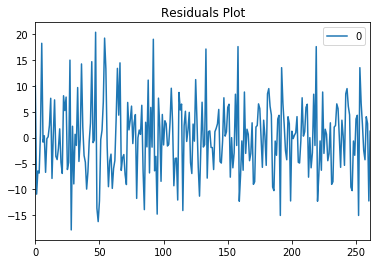

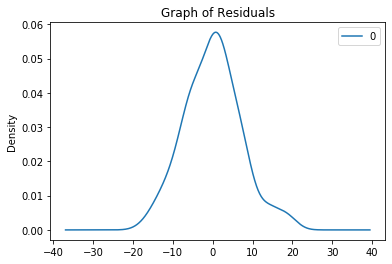

**************************************************
Statistic Summary of Residuals
                0
count  262.000000
mean     0.006179
std      7.105900
min    -17.813963
25%     -4.769136
50%      0.086927
75%      4.306663
max     20.333983
**************************************************
Test RMSE: 6.429


In [62]:
rsd = pnds.DataFrame(model_fit.resid)
rsd.plot()
plt.title("Residuals Plot")
plt.show()

# Below is the residuals(errors) density plot
rsd.plot(kind='kde')
plt.title("Graph of Residuals")
plt.show()

print("*"*50)

print("Statistic Summary of Residuals")
print(rsd.describe())

print("*"*50)

#Calculating rmse value on the test dataset

rmse = sqrt(mean_squared_error(Test, predictions))
print('Test RMSE: %.3f' % rmse)


In [88]:
def Forecasted_TS_Visualization(series,forecasted_series,c,model):
    fig = plt.figure(figsize=(20, 3))
    series.plot(label='Actual')
    forecasted_series.plot(label='Forecasted')
    plt.xlabel('Date')
    plt.ylabel(c)
    plt.legend(loc='best')
    plt.title('{} model For {}'.format(model,c))
    plt.show()

In [89]:
predictions=[int(i) for i in predictions]

In [90]:
test_df=pnds.DataFrame(columns=["Observed","Predicted"])
test_df["Observed"]=dup_actual_test
test_df["Predicted"]=predictions

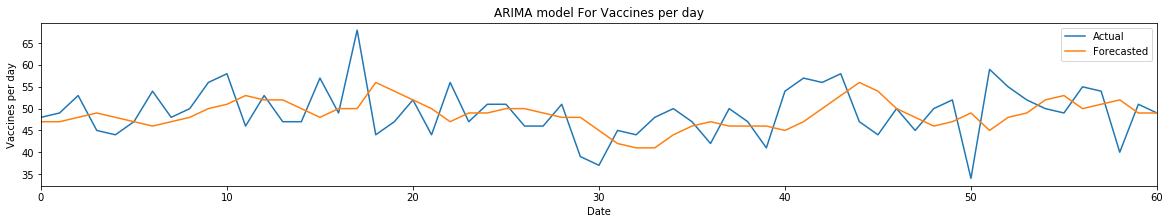

In [91]:
Forecasted_TS_Visualization(test_df["Observed"],test_df["Predicted"],"Vaccines per day","ARIMA")